In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Задача о прожвижении сотрудника по службе

## Основная информация
В этом наборе данных представлены сведения о работниках некоторой компании. Для каждого сотрудника указано:

* id - его идентификатор
* department - отдел
* region - регион
* education - ступень образования
* gender - пол
* recruitment_channel - канал найма
* no_of_trainings - количество пройденных тренингов
* age - возраст
* previous_year rating - рейтинг сотрудника за прошлый год
* length_of_service - стаж работы
* KPIs_met > 80 % - ключевые показатели эффективности выше 80 % ?
* awards_won ? - выигрывал ли награды?
* avg_training_score - средний балл на тренингах
* is_promoted - был ли повышен в должности?


Некоторое колличество человек каждый год получают продвижение по службе (примерно 5%). 
Задача заключается в определении достоин ли сотрудник получить повышение или нет на основе доступных данных. 

## 1. Загружаем данные

In [2]:
url = "https://raw.githubusercontent.com/NikolaySokolov152/MachineLearning/master/dataset/train.csv"

data_raw = pd.read_csv(url)

In [3]:
data_raw.shape

(54808, 14)

In [4]:
data_raw.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
data_raw.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
data_raw.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


## 2. Визуализация и описательная статистика

In [8]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


Кореляционная матрица

In [9]:
corr_mat = data_raw.corr()
corr_mat

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


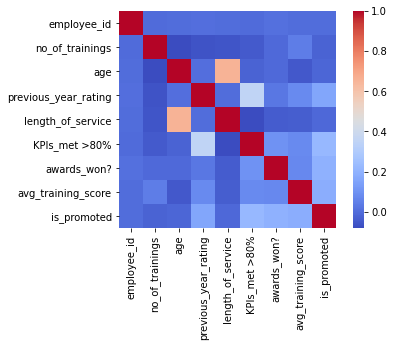

In [10]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

### Выводы:
#### length_of_service	корелирует с age (Есть прямая зависимость)
#### Также есть зависимость между KPIs_met >80% и previous_year_rating.

#### Наиболее значимые признаки для продвижения по должности - previous_year_rating,  KPIs_met >80%, awards_won? и avg_training_score


## 3. Обработка пропущенных значений (или убедиться, что их нет)

In [11]:
data_raw.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [12]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)
data_raw['education'].fillna(data_raw['education'].mode().iloc[0], inplace=True)
data_raw.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

No handles with labels found to put in legend.


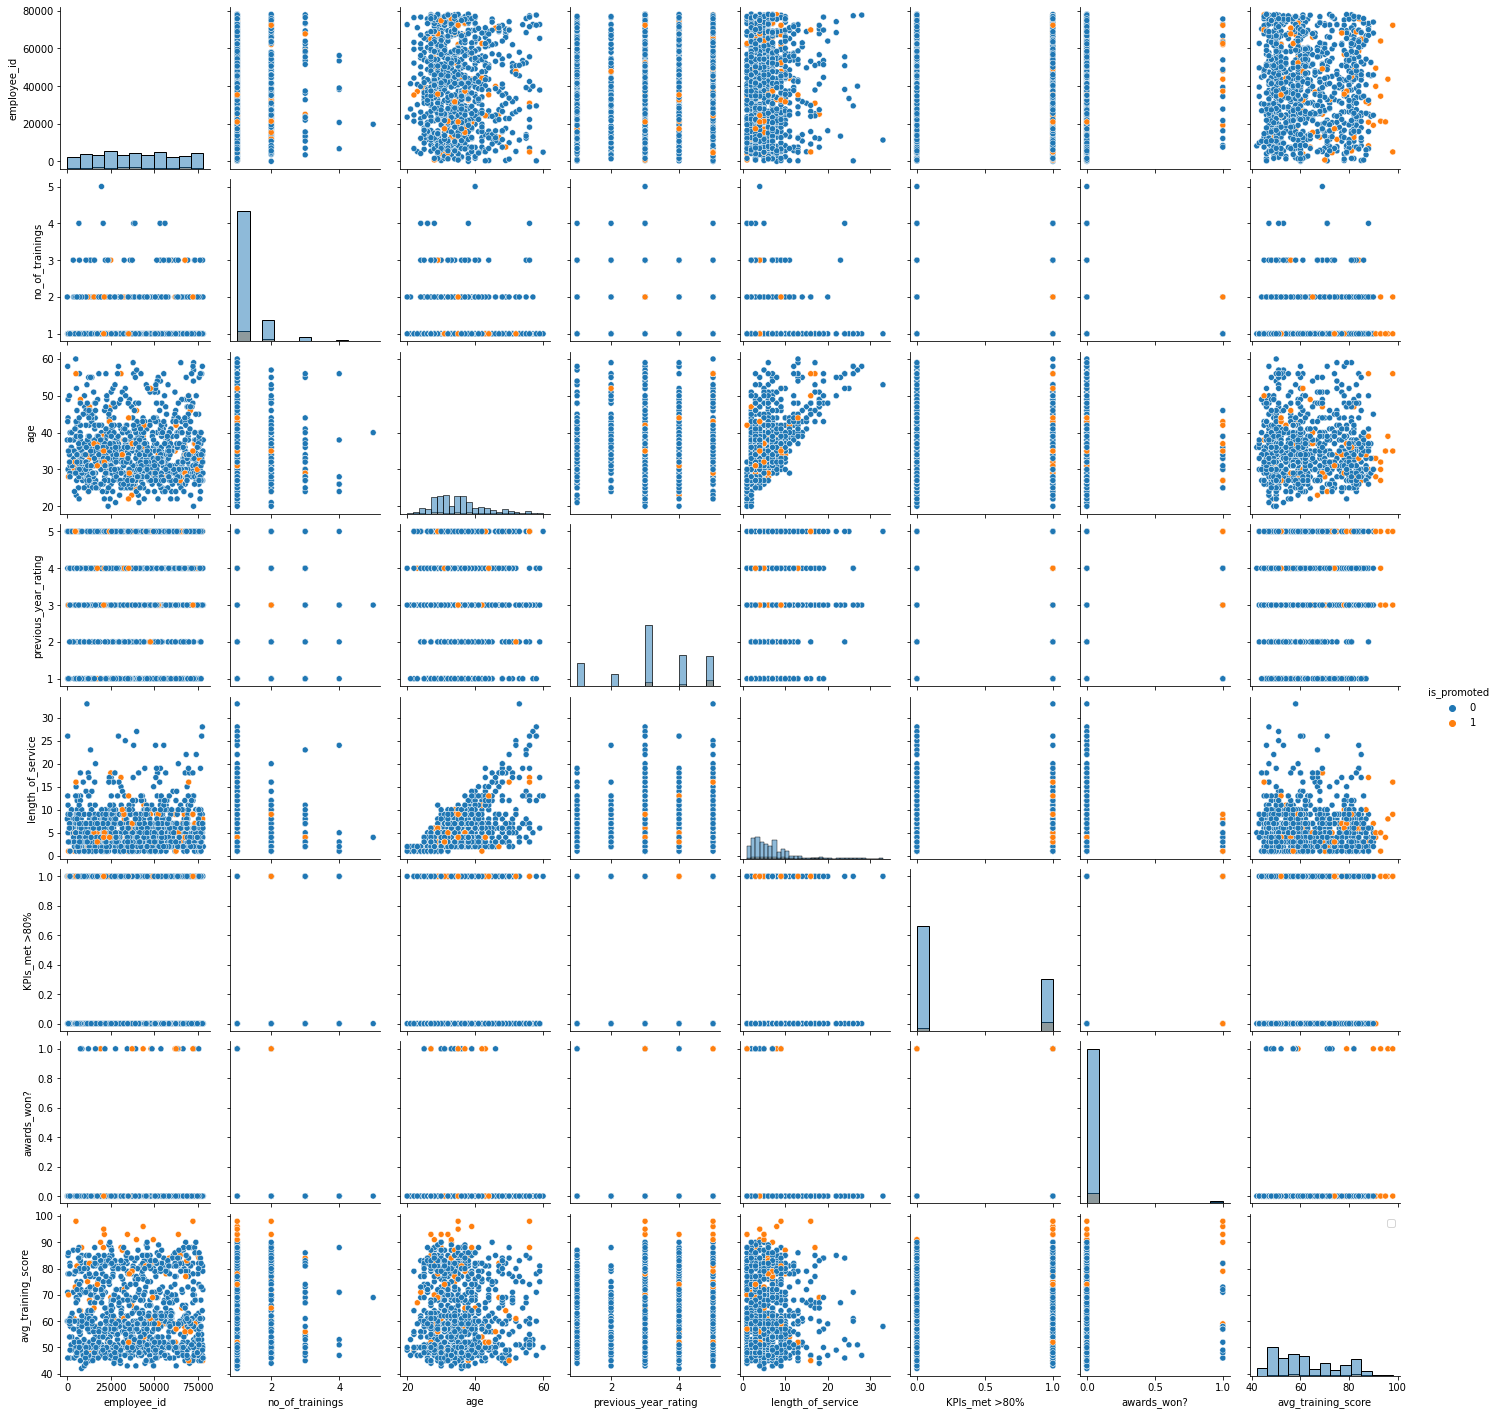

In [13]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data_raw.shape[0]), size=1000, replace=False)
sns.pairplot(data_raw.iloc[random_subset], hue='is_promoted', diag_kind='hist')
plt.legend()
pass

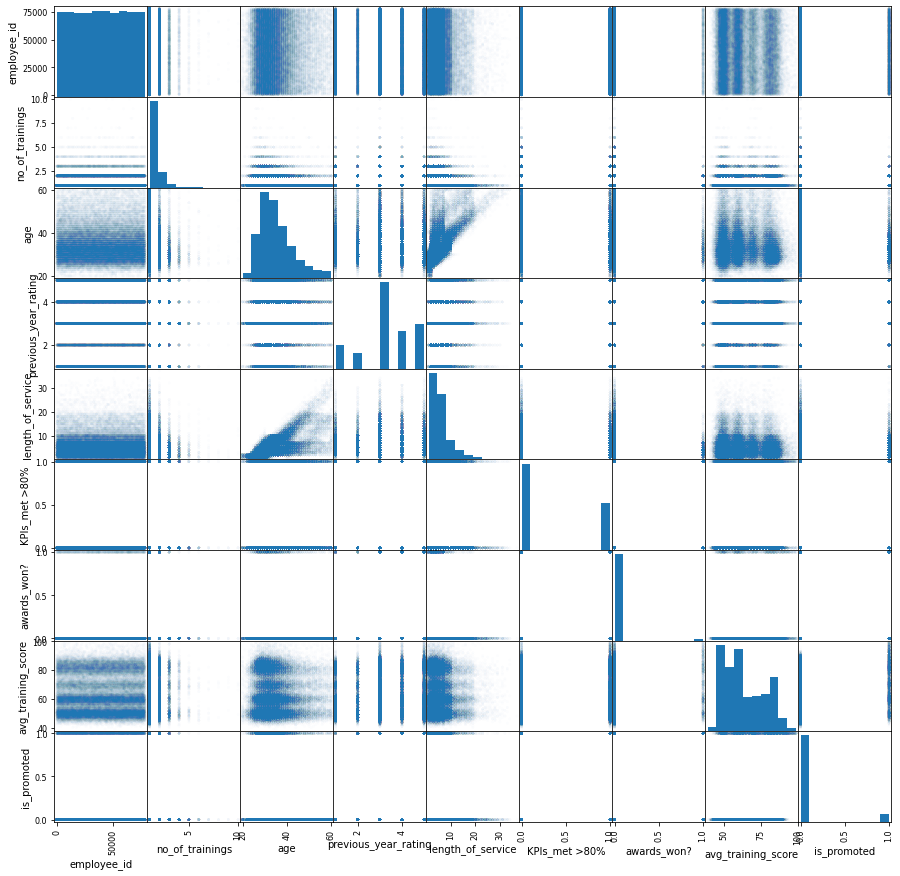

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_raw, alpha = .01, figsize = (15, 15))
pass

In [15]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


## 4. Обработка категориальных признаков

In [16]:
data_raw.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [17]:
data_raw.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,54808,54808,54808,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,39078,38496,30446


In [18]:
data_raw['department'] = data_raw['department'].astype('category')
data_raw['region'] = data_raw['region'].astype('category')
data_raw['education'] = data_raw['education'].astype('category')
data_raw['gender'] = data_raw['gender'].astype('category')
data_raw['recruitment_channel'] = data_raw['recruitment_channel'].astype('category')

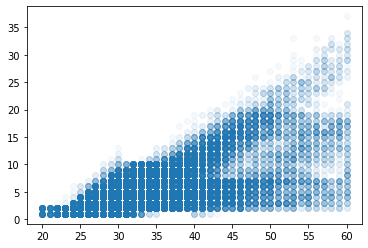

In [19]:
plt.scatter(data_raw['age'], data_raw['length_of_service'], alpha = .04)
pass

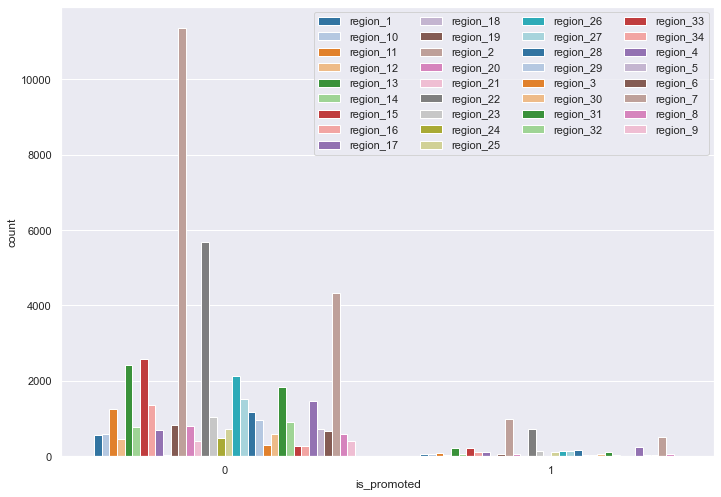

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='is_promoted', hue = 'region', palette = 'tab20', data = data_raw)
plt.legend(ncol=4, loc='upper right')
pass

Категориальные признаки

In [21]:
data_raw['gender'] = data_raw['gender'].cat.codes

In [22]:
Department_dummies = pd.get_dummies(data_raw['department'], prefix = 'department')
Education_dummies = pd.get_dummies(data_raw['education'], prefix = 'education')
Recruitment_channel_dummies = pd.get_dummies(data_raw['recruitment_channel'], prefix = 'recruitment_channel')
Region_dummies = pd.get_dummies(data_raw['region'])


In [23]:
data_raw = pd.concat((data_raw, Department_dummies), axis=1)
data_raw = data_raw.drop(['department'], axis=1)

data_raw = pd.concat((data_raw, Education_dummies), axis=1)
data_raw = data_raw.drop(['education'], axis=1)

data_raw = pd.concat((data_raw, Recruitment_channel_dummies), axis=1)
data_raw = data_raw.drop(['recruitment_channel'], axis=1)

data_raw = pd.concat((data_raw, Region_dummies), axis=1)
data_raw = data_raw.drop(['region'], axis=1)

In [24]:
data_raw.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,0,0,0,0,0,0,1,0,0
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,0,0,0,0,0,0


## 5. Нормализация
для корректной нормализации бинарных призноков я нормализовал как линейное растяжение к [0:1]

In [25]:
data_stand = (data_raw - data_raw.min(axis = 0))/(data_raw.max(axis = 0)-data_raw.min(axis = 0))
data_stand.describe()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,...,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.500592,0.702379,0.028112,0.370098,0.576120,0.135153,0.351974,0.023172,0.406446,0.085170,...,0.035305,0.017242,0.004908,0.005328,0.031072,0.013976,0.012589,0.088363,0.011951,0.007663
std,0.288473,0.457216,0.067696,0.191504,0.303692,0.118475,0.477590,0.150450,0.222859,0.279137,...,0.184551,0.130173,0.069886,0.072797,0.173514,0.117392,0.111495,0.283825,0.108666,0.087204
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.251207,0.000000,0.000000,0.225000,0.500000,0.055556,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500971,1.000000,0.000000,0.325000,0.500000,0.111111,0.000000,0.000000,0.350000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750086,1.000000,0.000000,0.475000,0.750000,0.166667,1.000000,0.000000,0.616667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
data_stand.head()


,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6.Подготовка тестовой и тренировочной выборок

In [27]:
data_stand.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above',
       'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33

In [28]:
data_stand.isna().sum()

employee_id                     0
gender                          0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
education_Bachelor's            0
education_Below Secondary       0
education_Master's & above      0
recruitment_channel_other       0
recruitment_channel_referred    0
recruitment_channel_sourcing    0
region_1                        0
region_10                       0
region_11                       0
region_12                       0
region_13     

In [29]:
data_stand.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0.835754,0.0,0.000000,0.375,1.0,0.194444,1.0,0.0,0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.831960,1.0,0.000000,0.250,1.0,0.083333,0.0,0.0,0.350000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095942,1.0,0.000000,0.350,0.5,0.166667,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.032453,1.0,0.111111,0.475,0.0,0.250000,0.0,0.0,0.183333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.625107,1.0,0.000000,0.625,0.5,0.027778,0.0,0.0,0.566667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Уберу неинформативный признак id

In [30]:
emp_id = data_stand['employee_id']
data_stand = data_stand.drop(['employee_id'], axis = 1)

In [31]:
data_stand.columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'department_Analytics',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above', 'recruitment_channel_other',
       'recruitment_channel_referred', 'recruitment_channel_sourcing',
       'region_1', 'region_10', 'region_11', 'region_12', 'region_13',
       'region_14', 'region_15', 'region_16', 'region_17', 'region_18',
       'region_19', 'region_2', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_3', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34',

Разделение выборки на Х и У

In [32]:
Y = data_stand[['is_promoted']]
X = data_stand.drop(['is_promoted'], axis=1)
print("x:", X.shape)
print("y:", Y.shape)

x: (54808, 57)
y: (54808, 1)


### Разделение выборки на тренировочную и тестовую

In [33]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)
print("x_train: ", x_train.shape)
print("x_test ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (43846, 57)
x_test  (10962, 57)
y_train:  (43846, 1)
y_test:  (10962, 1)


## 7. Запуск классификатора К-ближайших соседей

size: 1  train_accuracy: 0.9997719290243123  test_accuracy: 0.8819558474730889


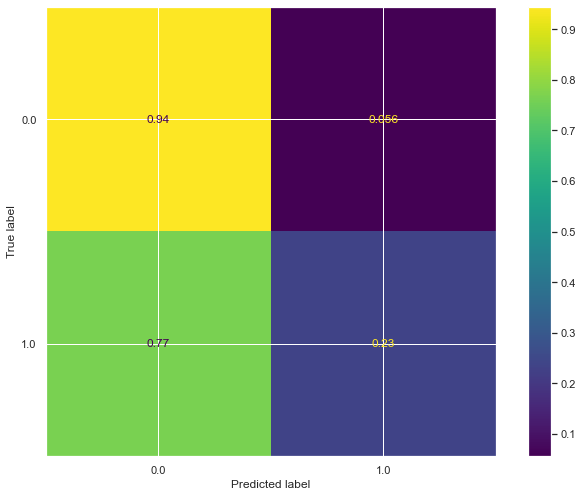

size: 3  train_accuracy: 0.9379875017105324  test_accuracy: 0.9029374201787995


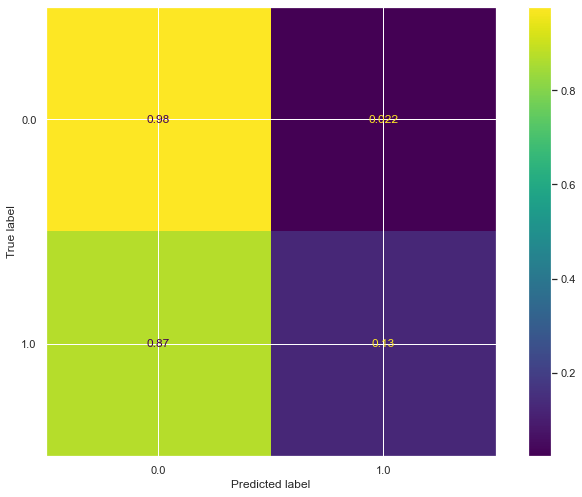

size: 5  train_accuracy: 0.9266295671212882  test_accuracy: 0.9059478197409232


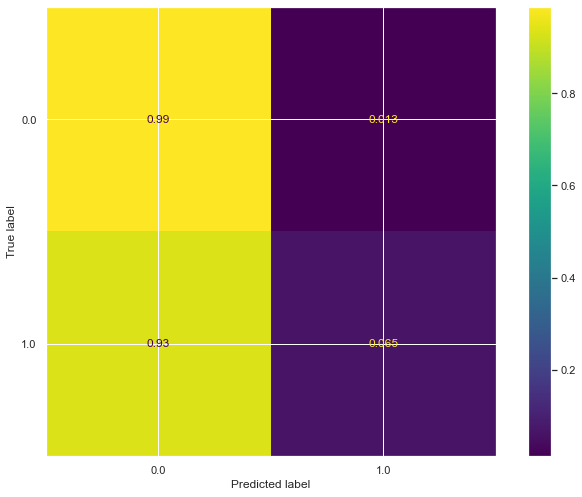

size: 7  train_accuracy: 0.9219313050221228  test_accuracy: 0.9086845466155811


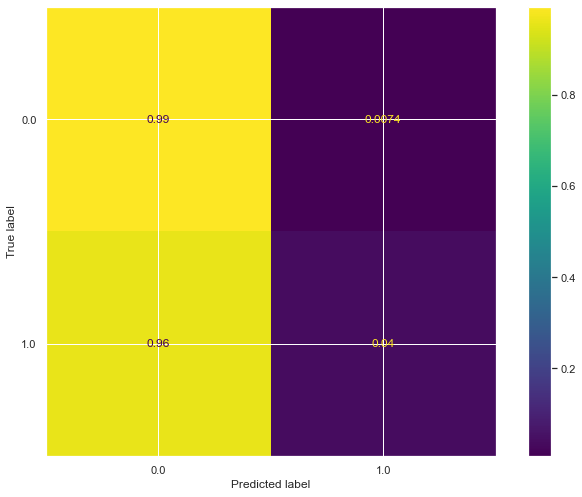

size: 9  train_accuracy: 0.9193541029968526  test_accuracy: 0.9106914796569969


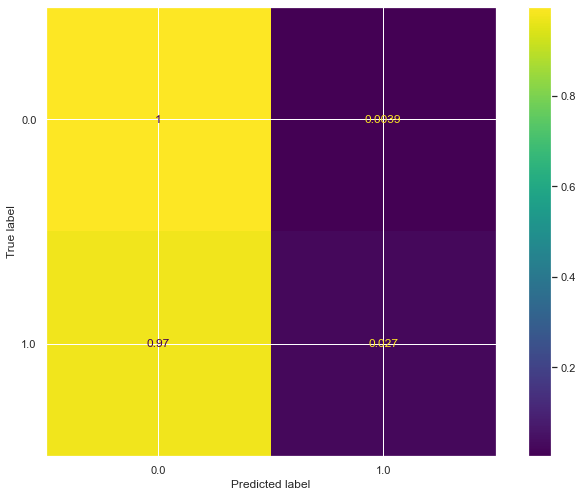

size: 11  train_accuracy: 0.9182821694111207  test_accuracy: 0.9110563765736179


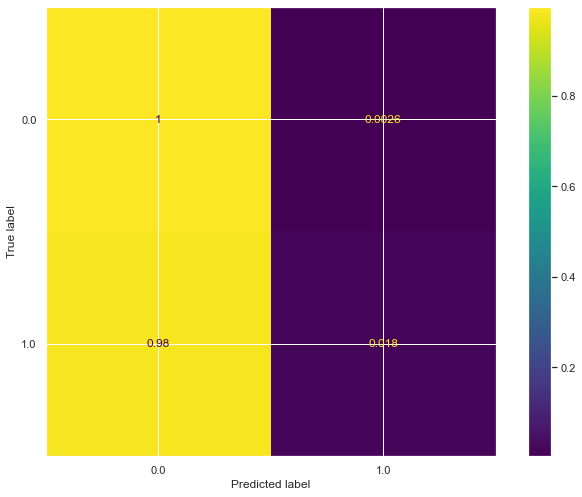

size: 13  train_accuracy: 0.9177804132646079  test_accuracy: 0.9116037219485496


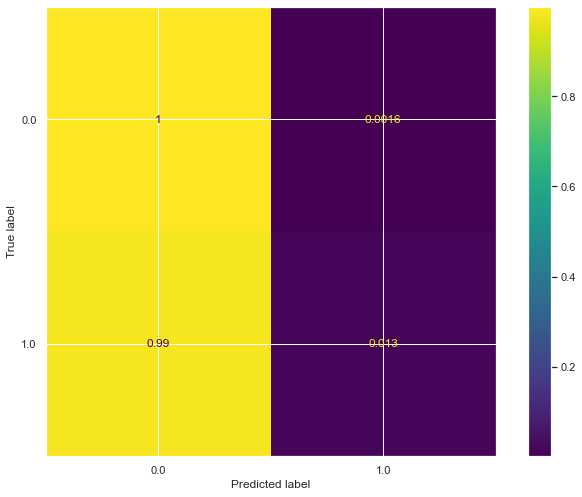

size: 15  train_accuracy: 0.9171190074351138  test_accuracy: 0.9118773946360154


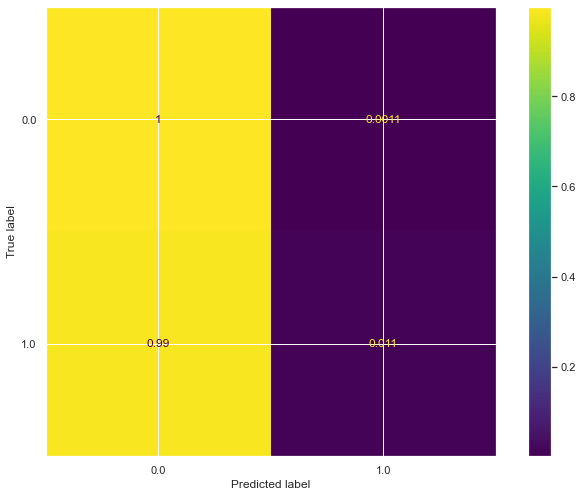

size: 17  train_accuracy: 0.9166628654837385  test_accuracy: 0.9123335157817917


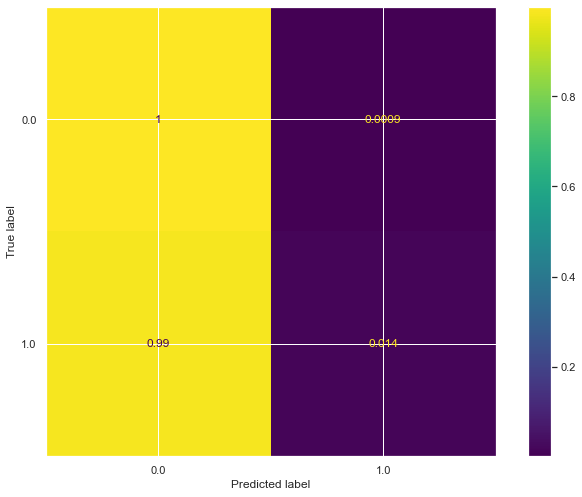

size: 19  train_accuracy: 0.9164119874104821  test_accuracy: 0.9124247400109469


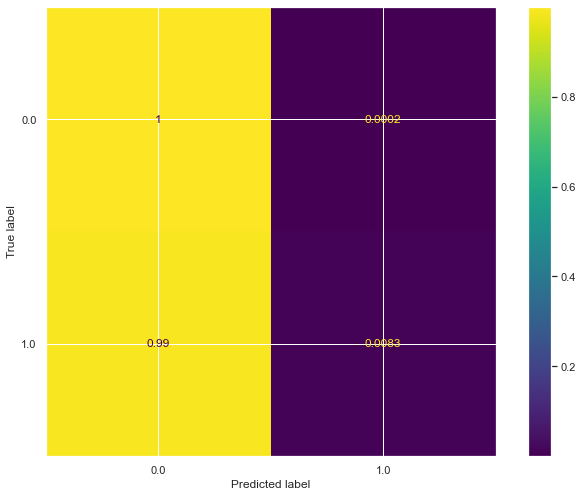

   size  train_accuracy  test_accuracy
0   1.0        0.999772       0.881956
1   3.0        0.937988       0.902937
2   5.0        0.926630       0.905948
3   7.0        0.921931       0.908685
4   9.0        0.919354       0.910691
5  11.0        0.918282       0.911056
6  13.0        0.917780       0.911604
7  15.0        0.917119       0.911877
8  17.0        0.916663       0.912334
9  19.0        0.916412       0.912425


In [35]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
    plot_confusion_matrix(knn, x_test, y_test, normalize='true')
    print('size:', i,' train_accuracy:',knn.score(x_train, y_train),
                    ' test_accuracy:',knn.score(x_test, y_test))
    plt.show()
print(acc)

size: 1  train_accuracy: 0.9997719290243123  test_accuracy: 0.8819558474730889


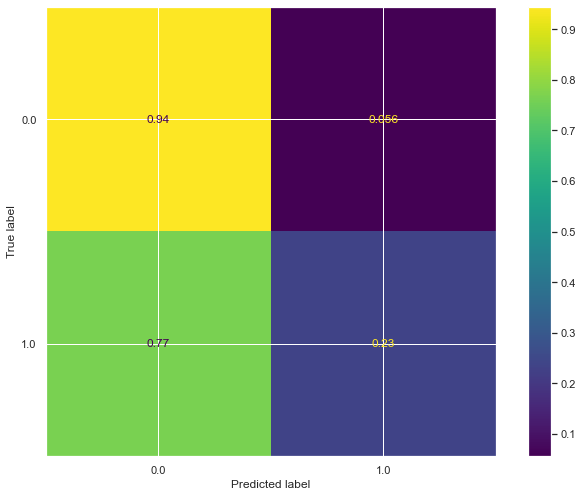

size: 2  train_accuracy: 0.9352506500022807  test_accuracy: 0.9101441342820653


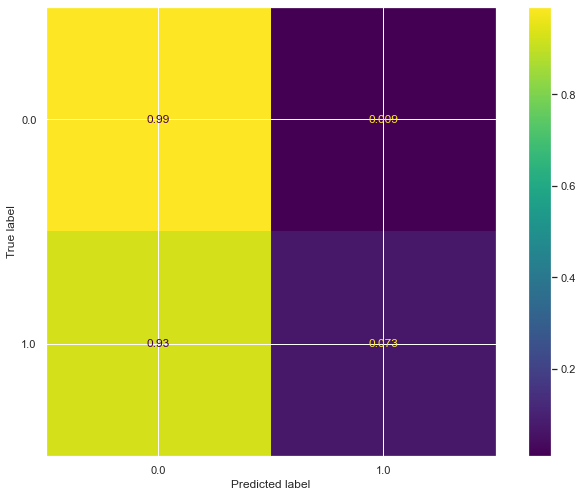

size: 3  train_accuracy: 0.9379875017105324  test_accuracy: 0.9029374201787995


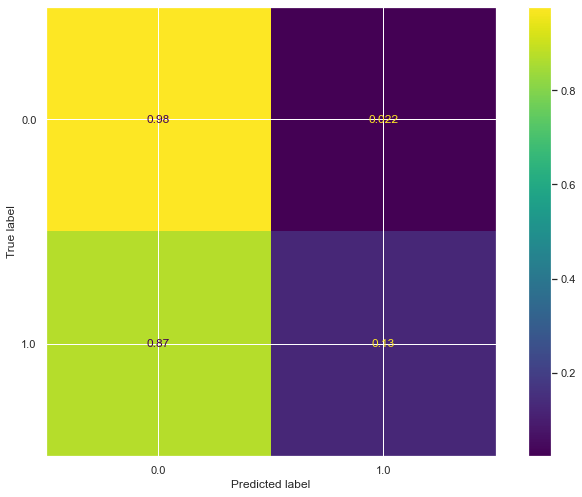

   size  train_accuracy  test_accuracy
0   1.0        0.999772       0.881956
1   2.0        0.935251       0.910144
2   3.0        0.937988       0.902937


In [36]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,4,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_train, y_train),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
    plot_confusion_matrix(knn, x_test, y_test, normalize='true')
    print('size:', i,' train_accuracy:',knn.score(x_train, y_train),
                    ' test_accuracy:',knn.score(x_test, y_test))
    plt.show()
print(acc)

## Случайный лес

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() # class_weight='balanced'
rfc.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", rfc.score(x_train, y_train))
print("Test Accuracy :", rfc.score(x_test, y_test))

Train Accuracy : 0.9997491219267436
Test Accuracy : 0.9330414158000365


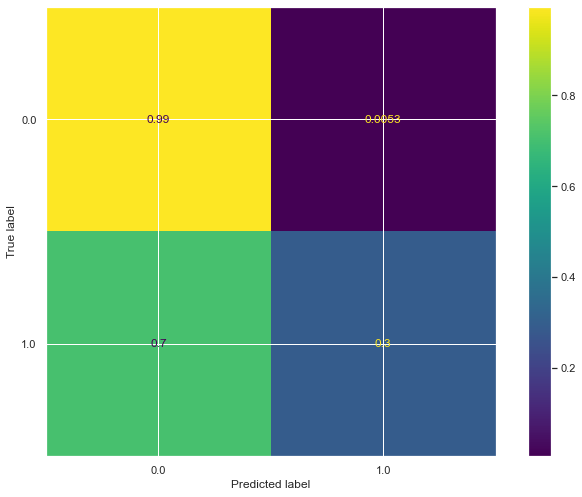

In [43]:
plot_confusion_matrix(rfc, x_test, y_test, normalize='true')
pass

### SVM

In [41]:
from sklearn import svm
# default rbf kernel - Radial basis function kernel
clf = svm.SVC() # class_weight='balanced'
clf.fit(x_train, y_train.values.ravel())
print("Train Accuracy :", clf.score(x_train, y_train))
print("Test Accuracy :", clf.score(x_test, y_test))

Train Accuracy : 0.9314418647082973
Test Accuracy : 0.9258347016967706


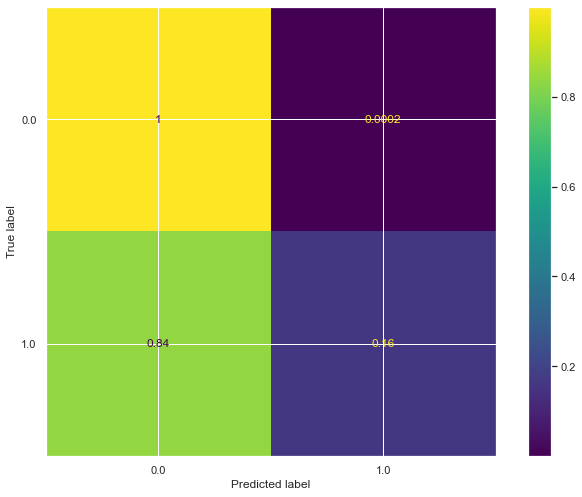

In [44]:
plot_confusion_matrix(clf, x_test, y_test, normalize='true')
pass

### PCA

Зависимость точности классификатора от количества компонент

In [46]:
from sklearn.decomposition import PCA
acc_pca = pd.DataFrame({'size':[],'train_accuracy_pca':[],'test_accuracy_pca':[], "is_promoted_true_pred":[]})
rfc = RandomForestClassifier(class_weight='balanced')
for i in range(24, 0, -1):
    pca = PCA(n_components=i)
    pca_x = pca.fit_transform(x_train)
    #pca_test_x = pca.transform(x_no_reg_test)
    #pca_x = pd.DataFrame(pca_x)
    #pca_test_x = pd.DataFrame(pca_test_x)
    x_tr, x_te, y_tr, y_te = train_test_split(pca_x, y_train, test_size = 0.25, random_state = 17)
    rfc.fit(x_tr, y_tr.values.ravel())
    #rfc.fit(pca_x, y_ext.values.ravel())
    acc_pca  = acc_pca.append({'size':i,'train_accuracy_pca':rfc.score(x_tr, y_tr),
                               'test_accuracy_pca':rfc.score(x_te, y_te),
                               "is_promoted_true_pred":confusion_matrix(y_te,rfc.predict(x_te),normalize='true')[1,1]},ignore_index=True)

print(acc_pca)

    size  train_accuracy_pca  test_accuracy_pca  is_promoted_true_pred
0   24.0            0.999757           0.919084               0.140107
1   23.0            0.999757           0.918902               0.139037
2   22.0            0.999787           0.919449               0.143316
3   21.0            0.999787           0.919723               0.141176
4   20.0            0.999818           0.919723               0.147594
5   19.0            0.999787           0.921547               0.163636
6   18.0            0.999757           0.920817               0.158289
7   17.0            0.999787           0.920452               0.160428
8   16.0            0.999787           0.921821               0.171123
9   15.0            0.999726           0.921365               0.173262
10  14.0            0.999726           0.920544               0.164706
11  13.0            0.999696           0.920909               0.170053
12  12.0            0.999787           0.921730               0.180749
13  11

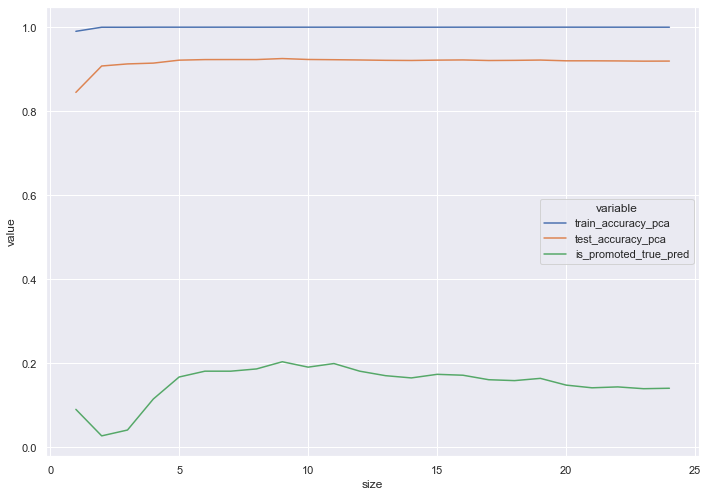

In [47]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(acc_pca, ['size']))
pass

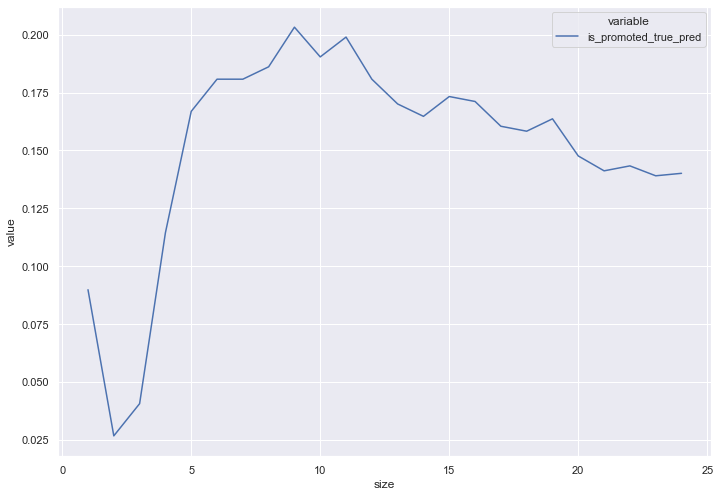

In [48]:
sns.lineplot(x='size', y='value', hue='variable', data=pd.melt(acc_pca, ['size','train_accuracy_pca','test_accuracy_pca']))
pass

## 8. Выводы 

Из-за сильной несбалансированности классов, высокая точность достигается за счет отказа всем работникам в повышении. Так как неповышенных больше 92%, то теряется значимость человека получившего повышение (1 среди 11 сильно теряется). Поэтому метод к-ближайших соседей работает лучше всего с наименьшим их количеством.

## 9. Борьба с несбалансированностью классов

In [34]:
from imblearn.over_sampling import SMOTE

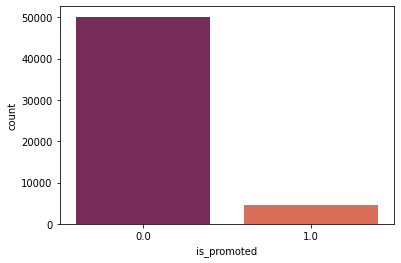

In [35]:
sns.countplot(x = 'is_promoted', data = Y, palette = 'rocket')
pass

In [37]:
x_ext, y_ext = SMOTE().fit_resample(x_train, y_train.values.ravel())
x_ext = pd.DataFrame(x_ext)
y_ext = pd.DataFrame(y_ext)
print("x extended :", x_ext.shape)
print("y extended :",y_ext.shape)

x extended : (80288, 57)
y extended : (80288, 1)


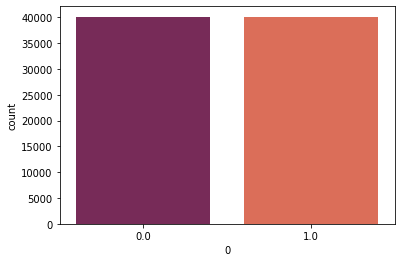

In [38]:
sns.countplot(x = 0, data = y_ext, palette = 'rocket')
pass

size: 1  train_accuracy: 0.9998754483858111  test_accuracy: 0.8634373289545704


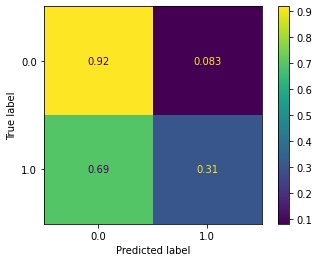

size: 3  train_accuracy: 0.9633693702670386  test_accuracy: 0.8347929209998175


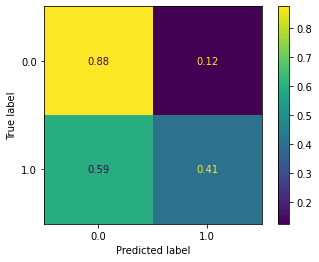

size: 5  train_accuracy: 0.9409251693901953  test_accuracy: 0.8108009487319832


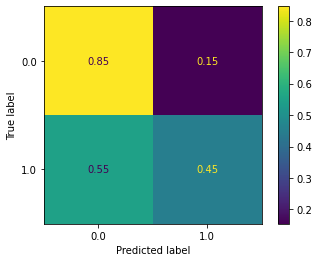

size: 7  train_accuracy: 0.9240608808290155  test_accuracy: 0.7942893632548805


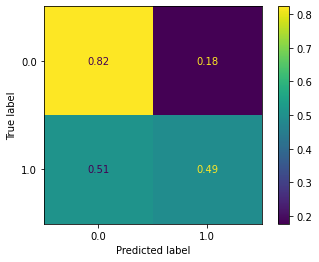

size: 9  train_accuracy: 0.9088655838979673  test_accuracy: 0.782703886152162


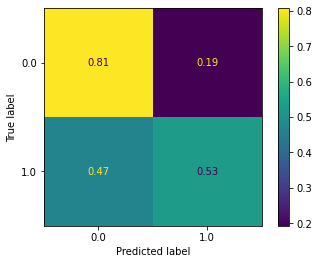

size: 11  train_accuracy: 0.8957378437624551  test_accuracy: 0.770571063674512


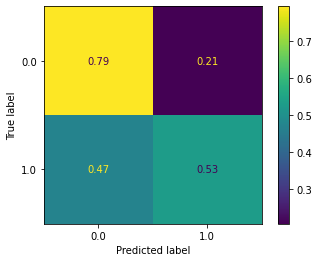

size: 13  train_accuracy: 0.8824357313670785  test_accuracy: 0.7593504834884145


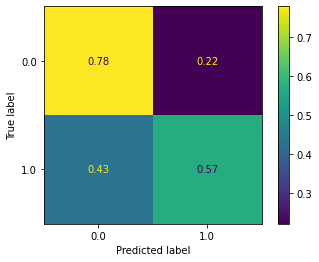

size: 15  train_accuracy: 0.871662016739737  test_accuracy: 0.7465790914066777


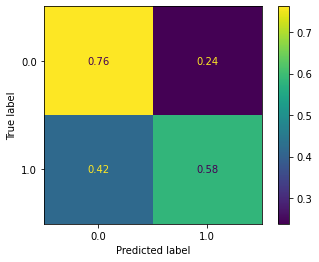

size: 17  train_accuracy: 0.8602655440414507  test_accuracy: 0.738733807699325


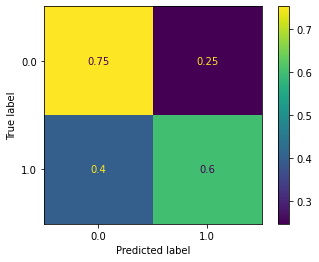

size: 19  train_accuracy: 0.8522568752491032  test_accuracy: 0.7328954570333881


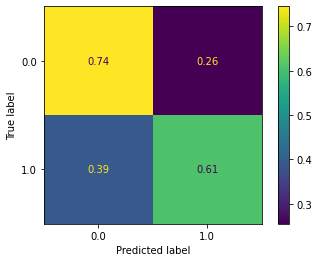

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.863437
1   3.0        0.963369       0.834793
2   5.0        0.940925       0.810801
3   7.0        0.924061       0.794289
4   9.0        0.908866       0.782704
5  11.0        0.895738       0.770571
6  13.0        0.882436       0.759350
7  15.0        0.871662       0.746579
8  17.0        0.860266       0.738734
9  19.0        0.852257       0.732895


In [40]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_ext, y_ext.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_ext, y_ext),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
    plot_confusion_matrix(knn, x_test, y_test, normalize='true')
    print('size:', i,' train_accuracy:',knn.score(x_ext, y_ext),
                    ' test_accuracy:',knn.score(x_test, y_test))
    plt.show()
print(acc)

size: 1  train_accuracy: 0.9998754483858111  test_accuracy: 0.8634373289545704


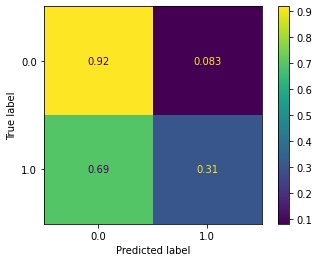

size: 2  train_accuracy: 0.9912689318453567  test_accuracy: 0.8731070972450283


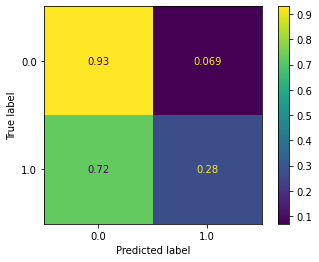

size: 3  train_accuracy: 0.9633693702670386  test_accuracy: 0.8347929209998175


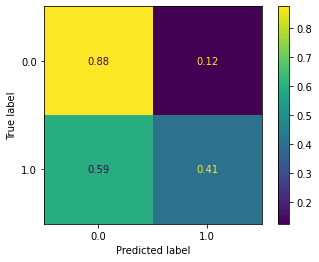

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.863437
1   2.0        0.991269       0.873107
2   3.0        0.963369       0.834793


In [41]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,4,1):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_ext, y_ext.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_ext, y_ext),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
    plot_confusion_matrix(knn, x_test, y_test, normalize='true')
    print('size:', i,' train_accuracy:',knn.score(x_ext, y_ext),
                    ' test_accuracy:',knn.score(x_test, y_test))
    plt.show()
print(acc)

size: 1  train_accuracy: 0.9998754483858111  test_accuracy: 0.8634373289545704


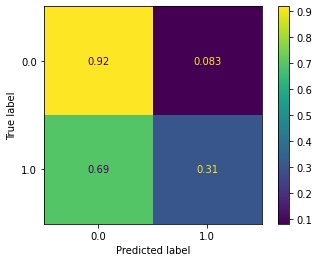

size: 11  train_accuracy: 0.8957378437624551  test_accuracy: 0.770571063674512


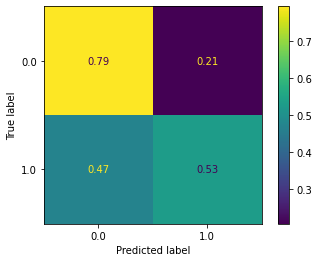

size: 21  train_accuracy: 0.8436254483858111  test_accuracy: 0.7247765006385696


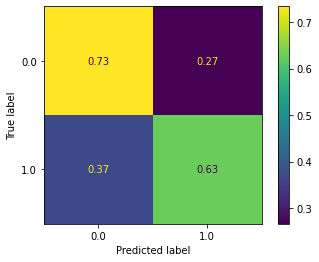

size: 31  train_accuracy: 0.8133469509764847  test_accuracy: 0.6939427111840905


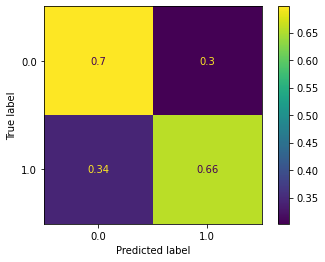

size: 41  train_accuracy: 0.7930201275408529  test_accuracy: 0.6717752234993615


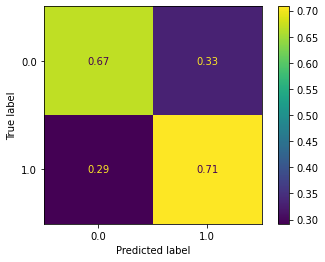

size: 51  train_accuracy: 0.7772020725388601  test_accuracy: 0.6509760992519613


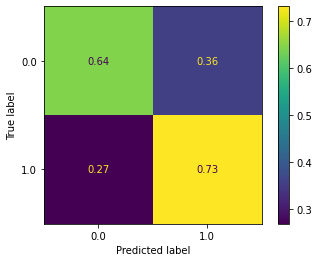

   size  train_accuracy  test_accuracy
0   1.0        0.999875       0.863437
1  11.0        0.895738       0.770571
2  21.0        0.843625       0.724777
3  31.0        0.813347       0.693943
4  41.0        0.793020       0.671775
5  51.0        0.777202       0.650976


In [42]:
acc = pd.DataFrame({'size':[],'train_accuracy':[],'test_accuracy':[]})
for i in range(1,52,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_ext, y_ext.values.ravel())
    acc  = acc.append({'size':i,'train_accuracy':knn.score(x_ext, y_ext),
                                 'test_accuracy':knn.score(x_test, y_test)},ignore_index=True)
    plot_confusion_matrix(knn, x_test, y_test, normalize='true')
    print('size:', i,' train_accuracy:',knn.score(x_ext, y_ext),
                    ' test_accuracy:',knn.score(x_test, y_test))
    plt.show()
print(acc)

На сбалансированном датасете kNN классификатор показал общую точность хуже, чем на несбалансированным. Предсказания не повышений упали с (94-100)% до (74-92)%. Точность предсказания повышений поднялась с (1-23)% до (31-61)%.
Снижение точности связано из-за изменения исходного распределения выборки, из-за чего пывышались те, кто не должен был.


##  9. Общие выводы

Для данной задачи классификации KNN подходит плохо так как не учитывает внутренние признаки, а производит сравнение с соседями, из-за чего крайне трудно определить к какому классу отнести человека, если при обучении имеются схожие классы.

Классификатор kNN работает долго на имеющейся конфигурации ПК и датасете размером в несколько десятков тысяч записей.

train_accuracy: 0.9998754483858111 ≠ 1 при k=1 говорит о наличии нескольких схожих(одинаковых) данных но принадлежащих разным классам. Это может быть связано с заполнением пропущенных значений. 

Балансировка датасета с одной стороны улучшела ситуацию с предсказанием повешения, однако ухудшело с отказом в повешении, выдавая повышения тем, кто этого не заслужил. Так как на практике количество людей, которых не повысили значительно больше, то балансировка датасета ухудшила оценку для реальных результатов, сильно увеличив ошибку 2 рода.

В данных было 2 коррелированных критерия с значением ~0.6 - возвраст и стаж, однако исключать их не стал, так как это значение не сильно большое. Поэтому нельзя сказать что одно зависит от другого и дублирует критерии, но это достаточно вероятно. 

По гистограммам регионов можно предположить, что в каждом из них повышается примерно одинаковая доля сотрудников, однако я не стал исключать этот критерий, так как численность человек в них различна и было предположение, что это может повлиять на результат.

Результаты классификаторов (test accuracy)

| Классификатор |   test accuracy |
| ------------- |:---------------:|
| KNN           |   0.912         |
| Случайный лес |   0.933         |
| SVM           |   0.926         |
| PCA           |   0.925         |
| MLP           |   0.941         |

Для решения данной задачи лучше всего подходит нейросеть MLP и Случайный лес. Несмотря на то, что задача многокритериальная, большая часть признаков была приобразована к бинарному виду, а остальные нормализованны, из-за чего можно было преминить нейросеть и получить хорошие результаты.

По результатам видно, что точно решить данную задачу по имеющимся признакам нельзя, так как не понятьно по каким критериям можно точно определить повышение и отказ в каждом случае. Есть даже люди с схожими характеристиками (или даже с совпадающими) пренадлижащих разным классам. В целом это не удивительно, так как данные не отражают субъективную оценку начальства к конкретному человеку. Это можно увидеть в данных, что человек с более низкими характеристиками получает повышение, а с более высокими нет (Причем есть различные комбинации для определения какая зарактеристика приводит к повышению, а какая нет). По этой причине можно постоить классификатор, который исключит личное отношение начальства к конкретному человеку, выдавая рекомендации кого повысить, кто был повышен "незаслуженно" и на кого нужно обратить внимание для расматрения на повышение.